# Getting started with neXtSIM-DG : 
## Quick  look at the model files (initial conditions and simulation ouptuts).

This notebooks explains how  to open and have a quick look at the model output files from  the neXtSIM-dg example "getting started in the doc)

---


In [8]:
## standart libraries
import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import matplotlib.pyplot as plt

#JUPYTER notebook magics
%matplotlib inline 

---
# Load initial conditions data from file init_rect3030.nc
This file contains the physical fields from which the ice simulation will start from.

In [9]:
ICdata = xr.open_dataset('/Users/leroux/WORK/DEV/NEXTSIM/nextsimdg/run/rect3030.res.nc',group='data')
#Note that the "group" option is necessary to read the files (netcdf4 format).
ICdata

<xarray.Dataset>
Dimensions:  (x: 30, y: 30, nLayers: 1)
Dimensions without coordinates: x, y, nLayers
Data variables:
    mask     (x, y) float64 ...
    cice     (x, y) float64 ...
    hice     (x, y) float64 ...
    hsnow    (x, y) float64 ...
    sss      (x, y) float64 ...
    sst      (x, y) float64 ...
    tice     (x, y, nLayers) float64 ...

---
# Plot land/sea mask and SST initial conditions

* Land sea mask:

<function matplotlib.pyplot.close(fig=None)>

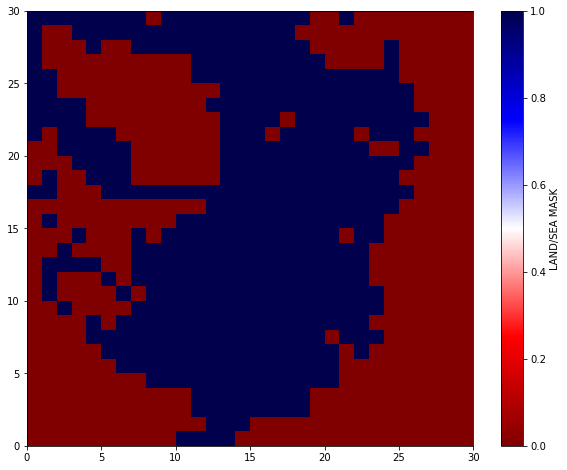

In [20]:
fig,(ax) = plt.subplots(1, 1, figsize=[10, 8],facecolor='w')
p = ax.pcolormesh(ICdata.mask,cmap='seismic_r')
plt.colorbar(p,label='LAND/SEA MASK')
plt.show
plt.close

* SST: in this example, the SST is hold constant for the entire simulation.

<function matplotlib.pyplot.close(fig=None)>

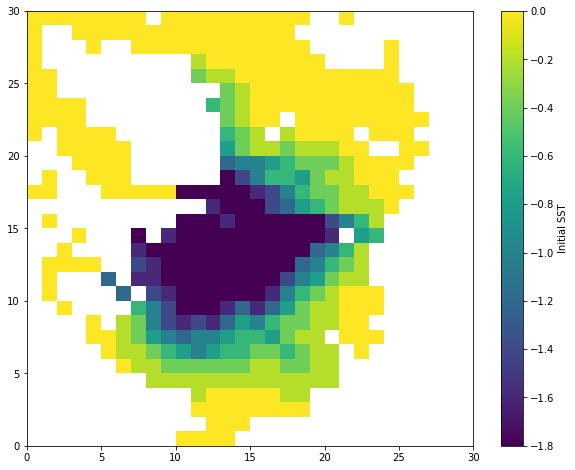

In [11]:
fig,(ax) = plt.subplots(1, 1, figsize=[10, 8],facecolor='w')
it=0
p = ax.pcolormesh(ICdata.sst)
plt.colorbar(p,label='Initial SST')
plt.show
plt.close

---
# Load all model output files at once using xarray

In this example, the model has run for 1 day with a timestep of 10 min. The  model state  was  saved at each timestep. --> 6x24 = 144 snapshots to display for each model  variable.


In [12]:
alldiags = xr.open_mfdataset('/Users/leroux/WORK/DEV/NEXTSIM/nextsimdg/run/diagnostic.*.nc', combine='nested', concat_dim='t',group='data')
alldiags

<xarray.Dataset>
Dimensions:        (t: 144, x: 30, y: 30, z: 1)
Dimensions without coordinates: t, x, y, z
Data variables:
    cice           (t, x, y) float64 dask.array<chunksize=(1, 30, 30), meta=np.ndarray>
    cice_initial   (t, x, y) float64 dask.array<chunksize=(1, 30, 30), meta=np.ndarray>
    cice_updated   (t, x, y) float64 dask.array<chunksize=(1, 30, 30), meta=np.ndarray>
    hice           (t, x, y) float64 dask.array<chunksize=(1, 30, 30), meta=np.ndarray>
    hice_initial   (t, x, y) float64 dask.array<chunksize=(1, 30, 30), meta=np.ndarray>
    hice_updated   (t, x, y) float64 dask.array<chunksize=(1, 30, 30), meta=np.ndarray>
    hsnow          (t, x, y) float64 dask.array<chunksize=(1, 30, 30), meta=np.ndarray>
    hsnow_initial  (t, x, y) float64 dask.array<chunksize=(1, 30, 30), meta=np.ndarray>
    hsnow_updated  (t, x, y) float64 dask.array<chunksize=(1, 30, 30), meta=np.ndarray>
    mask           (t, x, y) float64 dask.array<chunksize=(1, 30, 30), meta=np.ndarray>
    tice           (t, x, y, z) float64 dask.array<chunksize=(1, 30, 30, 1), meta=np.ndarray>

# Display sea ice concentration with time

* CICE at initial time:

<function matplotlib.pyplot.show(close=None, block=None)>

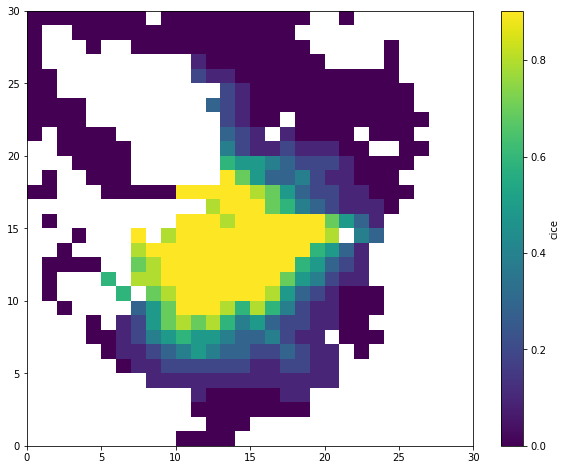

In [17]:
fig,(ax) = plt.subplots(1, 1, figsize=[10, 8],facecolor='w')
it=0
p = ax.pcolormesh(alldiags.cice.isel(t=it))
plt.colorbar(p,label='cice')
plt.show

* CICE evolving with time (24h simulation):

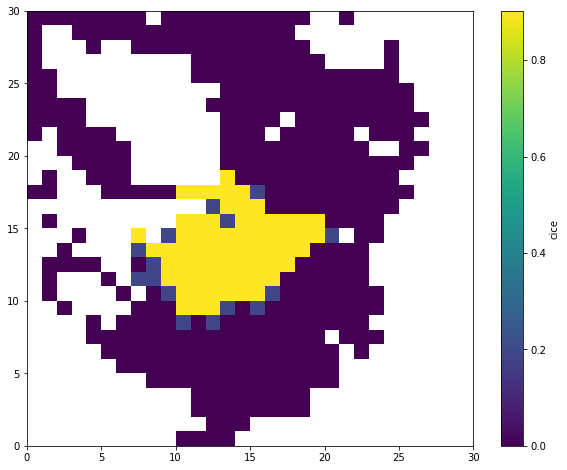

In [13]:
from matplotlib import animation
from IPython.display import HTML

NTIME = alldiags.t.size


fig,(ax) = plt.subplots(1, 1, figsize=[10, 8],facecolor='w')
it=0
p = ax.pcolormesh(alldiags.cice.isel(t=it))
plt.colorbar(p,label='cice')


def animate(it):
    p.set_array(alldiags.cice.isel(t=it))
    p.set_label('test '+str(it))
    return p,

def init():
    p.set_array(alldiags.cice.isel(t=0))
    return p,

ani = animation.FuncAnimation(fig=fig,
                              func=animate,
                              frames=NTIME,
                              interval=1,
                              blit=True)

HTML(ani.to_jshtml())
